# Descobrir quais disciplinas precisam de uma atenção maior
Objetivo: destacar graficamente quais disciplinas os professores vão precisar tomar atitudes para melhorar o rendimento dos alunos

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import os
import seaborn as sns

# Trazendo as informações do banco de dados

In [2]:
# Obtendo o diretório atual
diretorio_atual = os.getcwd()

# Construindo o caminho completo para o arquivo Excel
caminho_arquivo_excel = os.path.join(diretorio_atual, 'dados_academicos.xlsx')

# Lendo o arquivo Excel
dados_excel = pd.read_excel(caminho_arquivo_excel)


In [3]:
dados_excel.tail()

,aluno_id,turma_id,notas,nome_aluno,matricula,ano,semestre,disciplina_id,nome_disciplina,codigo,professor_id,nome_professor,email,senha,papel
295,10,26,9,Victoria Rivera,8695646,2022,B,5,História,HIS101,5,Jennifer Bruce,erica12@example.com,b#C8B2Qyj@,Professor
296,10,27,6,Victoria Rivera,8695646,2023,A,5,História,HIS101,5,Jennifer Bruce,erica12@example.com,b#C8B2Qyj@,Professor
297,10,28,9,Victoria Rivera,8695646,2023,B,5,História,HIS101,5,Jennifer Bruce,erica12@example.com,b#C8B2Qyj@,Professor
298,10,29,6,Victoria Rivera,8695646,2024,A,5,História,HIS101,5,Jennifer Bruce,erica12@example.com,b#C8B2Qyj@,Professor
299,10,30,10,Victoria Rivera,8695646,2024,B,5,História,HIS101,5,Jennifer Bruce,erica12@example.com,b#C8B2Qyj@,Professor


# Notas dos alunos durante o semestre A e ano 2024

Vamos assumir que qualquer média de nota abaixo de 4.0 será considerada como indicativo de que os alunos estão indo mal na disciplina.

In [4]:
ano_interesse = 2024
semestre_interesse = 'A'
nota_interesse = 4

# Filtrando para o semestre e ano de interesse
dados_filtro = dados_excel[(dados_excel['semestre'] == semestre_interesse) & (dados_excel['ano'] == ano_interesse)]

## Indicadores Gerais

In [5]:
# Número de disciplinas
num_disciplinas = dados_filtro['disciplina_id'].nunique()

# Número total de estudantes
num_estudantes = dados_filtro['aluno_id'].nunique()

# Média geral das notas
media_geral_notas = dados_filtro['notas'].mean()

print("Indicadores Gerais:")
print("===================")
print(f"Número de Disciplinas: {num_disciplinas}")
print(f"Número Total de Estudantes: {num_estudantes}")
print(f"Média Geral das Notas: {media_geral_notas:.2f}")

Indicadores Gerais:
Número de Disciplinas: 5
Número Total de Estudantes: 10
Média Geral das Notas: 4.46


## Média de notas por disciplina

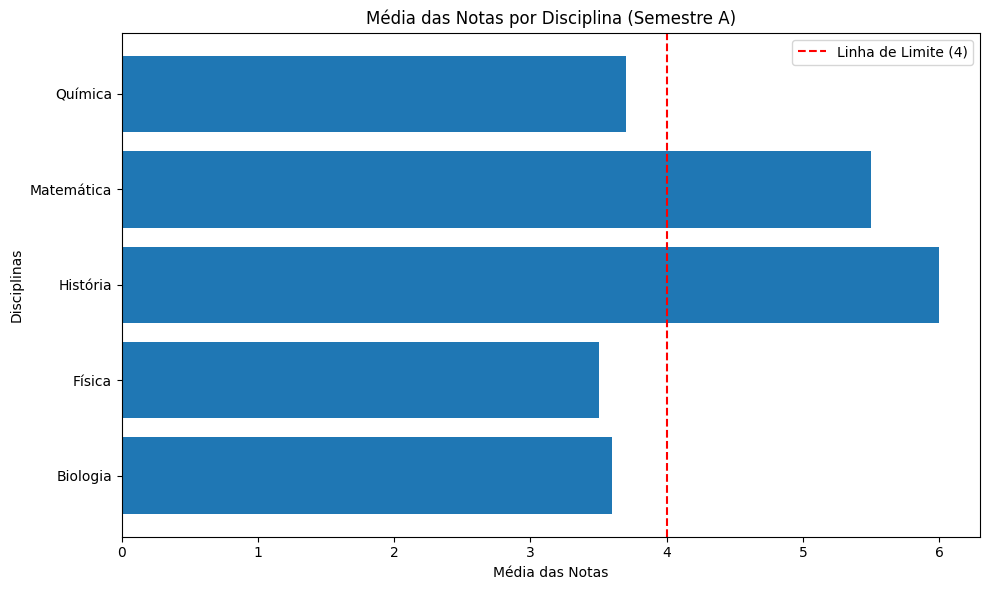

In [6]:
# Calculando a média das notas por disciplina e semestre
medias_notas = dados_filtro.groupby(['nome_disciplina', 'semestre', 'ano'])['notas'].mean().reset_index()

# Criando gráfico de barras
plt.figure(figsize=(10, 6))
plt.barh(medias_notas['nome_disciplina'], medias_notas['notas'])

# Adicionando uma linha horizontal para o limite
plt.axvline(x=nota_interesse, color='red', linestyle='--', label=f'Linha de Limite ({nota_interesse})')

# Adicionando rótulos e título
plt.xlabel('Média das Notas')
plt.ylabel('Disciplinas')
plt.title('Média das Notas por Disciplina (Semestre A)')
plt.legend()

# Exibindo o gráfico
plt.tight_layout()
plt.show()


## Distribuição das notas dos alunos por disciplina

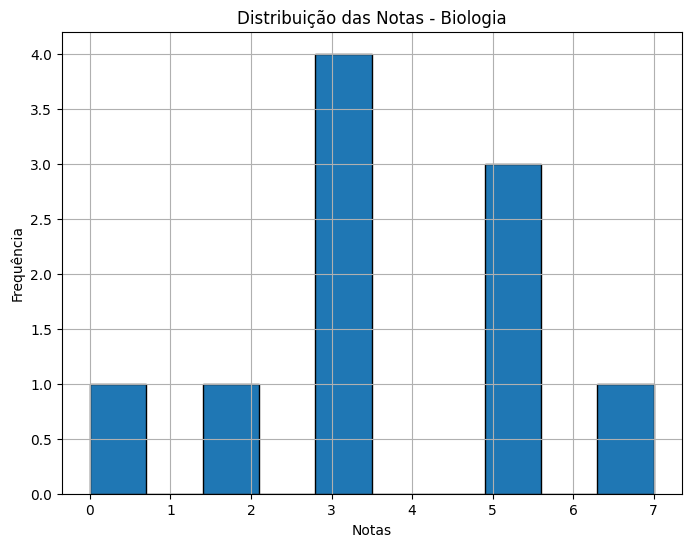

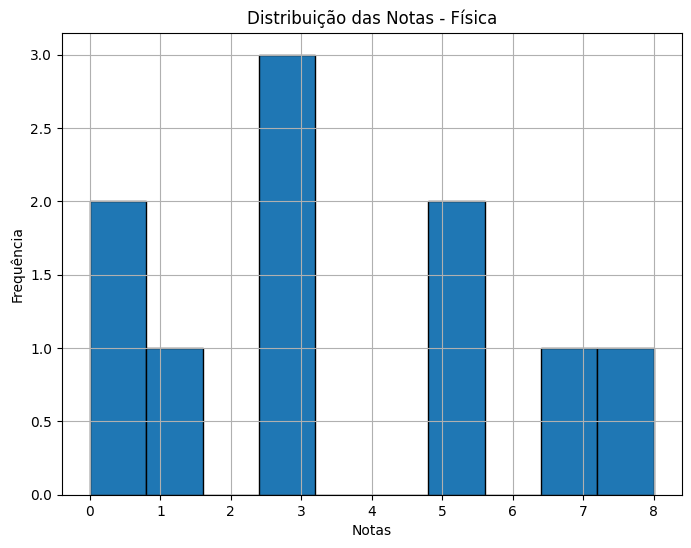

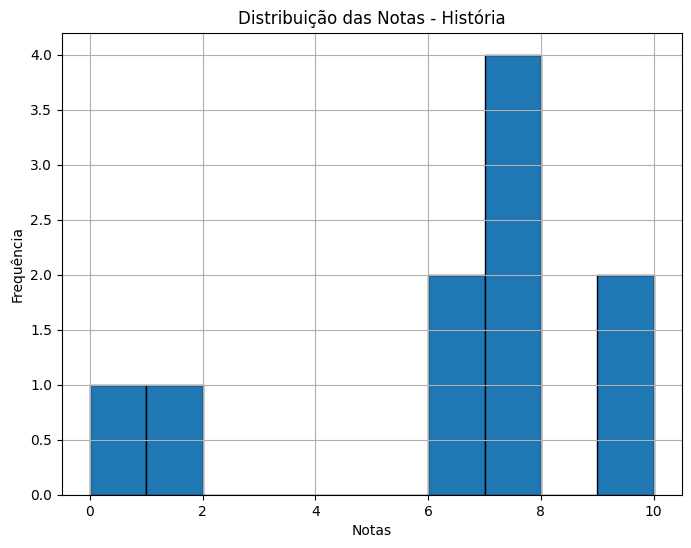

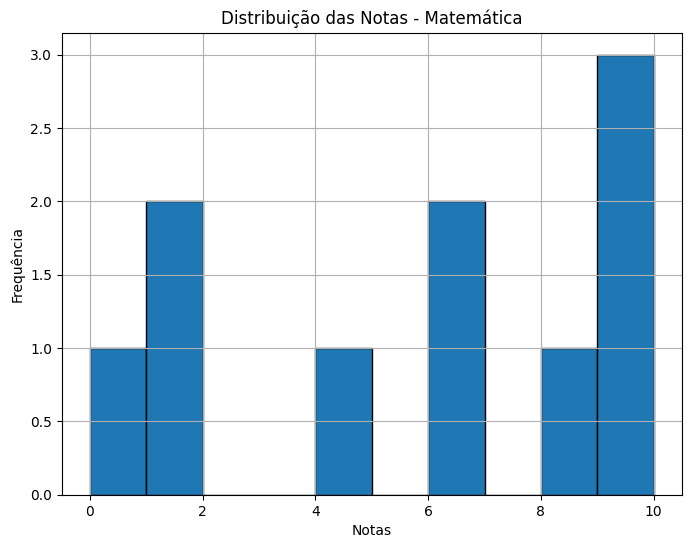

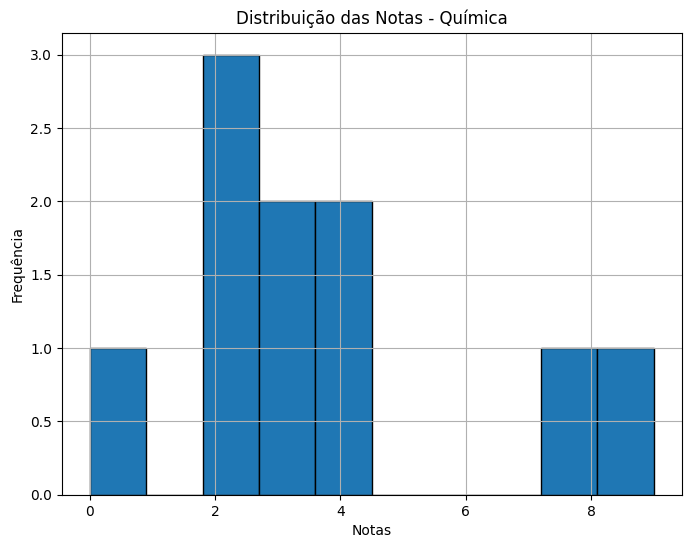

In [7]:
# Função para gerar histograma das notas
def plot_histogram(data, disciplina):
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=10, edgecolor='black')
    plt.title(f'Distribuição das Notas - {disciplina}')
    plt.xlabel('Notas')
    plt.ylabel('Frequência')
    plt.grid(True)
    plt.show()

# Loop sobre cada disciplina
for disciplina, notas_disciplina in dados_filtro.groupby('nome_disciplina'):
    plot_histogram(notas_disciplina['notas'], disciplina)

## Risco Escolar

- sem risco: Nota média >= 5
- risco baixo: Nota média >= 4
- risco medio: Nota média >= 3
- risco alto: Nota média < 3

In [8]:
#Definir as categorias de Risco Escolar com base nas notas médias
def categorizar_risco(nota_media):
    if nota_media >= 5:
        return 'Sem Risco'
    elif nota_media >= 4:
        return 'Risco Baixo'
    elif nota_media >= 3:
        return 'Risco Médio'
    else:
        return 'Risco Alto'

### Geral

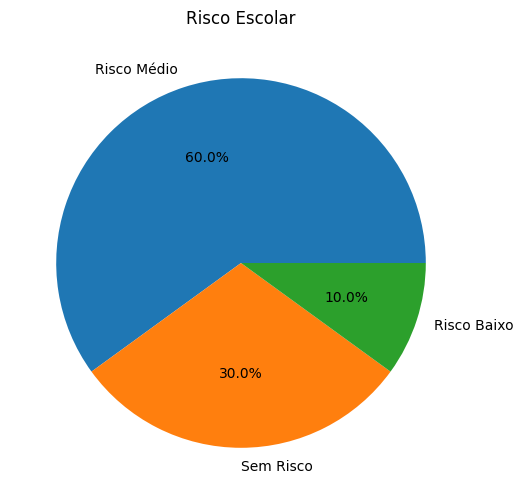

In [9]:
# Calcular as notas médias por aluno
notas_medias_alunos = dados_filtro.groupby('aluno_id')['notas'].mean()

# Aplicar a função de categorização aos dados de notas médias
alunos_risco_escolar = notas_medias_alunos.apply(categorizar_risco)

# Calcular o percentual de alunos em cada categoria de Risco Escolar para o gráfico geral da turma
percentual_geral = alunos_risco_escolar.value_counts(normalize=True) * 100

# Gráfico de pizza para a turma inteira
plt.figure(figsize=(8, 6))
percentual_geral.plot(kind='pie', autopct='%1.1f%%')
plt.title("Risco Escolar")
plt.ylabel('')
plt.show()

### Disciplina

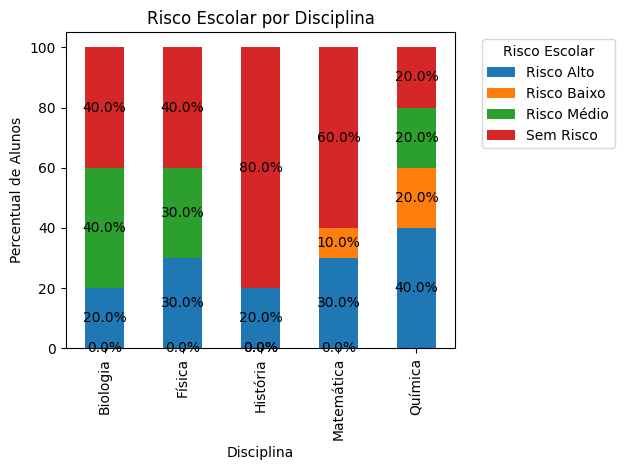

In [10]:
# Calcular as notas médias por disciplina
notas_medias_disciplinas = dados_filtro.groupby(['nome_disciplina','aluno_id'])['notas'].mean()

# Aplicar a função de categorização aos dados de notas médias
disciplinas_risco_escolar = notas_medias_disciplinas.apply(categorizar_risco)

# Calcular o percentual de alunos em cada categoria de Risco Escolar para cada disciplina
percentual_por_disciplina = disciplinas_risco_escolar.groupby('nome_disciplina').value_counts(normalize=True) * 100

# Gráfico por disciplina
# Gráfico por disciplina
ax = percentual_por_disciplina.unstack().plot(kind='bar', stacked=True)
plt.title('Risco Escolar por Disciplina')
plt.xlabel('Disciplina')
plt.ylabel('Percentual de Alunos')
plt.legend(title='Risco Escolar', bbox_to_anchor=(1.05, 1), loc='upper left')

# Adicionando os números nas barras
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width / 2, y + height / 2), ha='center', va='center')

plt.tight_layout()
plt.show()
